In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#mypath = r'C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\Renzo Results\renzo_trials'
#mypath = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\min_cost_T1"
#mypath = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\run_5_before_class"
#mypath = r'C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\min_runtime_T1'
#mypath = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\test_run"
mypath = r"cplex_results/analysis"
f = []
for (dirpath, dirnames, filenames) in os.walk(mypath):
    filenames
    break


In [3]:
number_of_configurations = len(dirnames)
number_instances_per_config = len(os.listdir(mypath + '/' + dirnames[0])) - 1


In [4]:
number_of_configurations, number_instances_per_config


(28, 14)

In [5]:
print("Folders")
dir_name_list = []
count = 0
for i, dirname in enumerate(dirnames):
    count += 1
    dir_name_list.append(dirname)
    print(i, ' ', dirname)
    


Folders
0   BACK_TO_OLD_1_22_12_07_09_42
1   BACK_TO_OLD_1_22_12_07_03_15
2   BACK_TO_OLD_1_22_12_07_00_31
3   BACK_TO_OLD_1_22_12_07_05_42
4   BACK_TO_OLD_1_22_12_07_05_56
5   BACK_TO_OLD_1_22_12_07_07_32
6   BACK_TO_OLD_1_22_12_07_02_59
7   BACK_TO_OLD_1_22_12_06_21_05
8   BACK_TO_OLD_1_22_12_07_01_07
9   BACK_TO_OLD_1_22_12_07_05_11
10   BACK_TO_OLD_1_22_12_07_09_12
11   BACK_TO_OLD_1_22_12_07_08_59
12   BACK_TO_OLD_1_22_12_06_21_52
13   BACK_TO_OLD_1_22_12_07_07_48
14   BACK_TO_OLD_1_22_12_07_06_09
15   BACK_TO_OLD_1_22_12_07_09_29
16   BACK_TO_OLD_1_22_12_07_06_22
17   BACK_TO_OLD_1_22_12_06_20_50
18   BACK_TO_OLD_1_22_12_07_01_58
19   BACK_TO_OLD_1_22_12_07_03_46
20   BACK_TO_OLD_1_22_12_06_22_48
21   BACK_TO_OLD_1_22_12_07_00_18
22   BACK_TO_OLD_1_22_12_07_04_56
23   BACK_TO_OLD_1_22_12_07_02_14
24   BACK_TO_OLD_1_22_12_07_01_42
25   BACK_TO_OLD_1_22_12_07_02_45
26   BACK_TO_OLD_1_22_12_06_22_30
27   BACK_TO_OLD_1_22_12_07_00_00


# Helper Functions

In [6]:
config_num = 0
instance_num = 0


def text_to_float(text):
    return float(text.split('= ')[-1].split(' \n')[0])

def text_to_str(text):
    return str(text.split('= ')[-1].split(' \n')[0])

def retrieve_instance_result(config_num, instance_num):
    """
    returns runtime and objective for a given configuration and instance number
    """
    path = mypath + '/' + dirnames[config_num]
    instance_filename = f'instance_{instance_num}.txt'

    if instance_filename in os.listdir(path):
        with open(path + '/' + instance_filename) as f:
            contents = f.readlines()

    rt = text_to_float(contents[-3])
    obj = text_to_float(contents[-2])
    status = text_to_str(contents[-1])

    return rt, obj, status


In [7]:
instance_num_list = []
number_instances_per_config = (os.listdir(mypath + '/' + dirnames[0]))
for name in number_instances_per_config:
    if name[0] == 'i':
        instance_num_list.append(name)
len(instance_num_list)

7

In [8]:
def get_metric_over_all_instances(config_num, metric):
    """
    Gets the runtime or obj for a given configuration number
    """
    number_of_configurations = len(dirnames)
    find_inst = os.listdir(mypath + '/' + dirnames[config_num])

    instance_num_list = []

    for name in find_inst:
        if name[0] == 'i':
            instance_num_list.append(name)

    metric_vals = []

    for instance_num in range(len(instance_num_list)):
        rt, obj = retrieve_instance_result(config_num, instance_num)

        if metric == 'runtime':
            metric_vals.append(rt)

        elif metric == 'obj':
            metric_vals.append(obj)

    return metric_vals


In [9]:
find_inst = os.listdir(mypath + '/' + dirnames[0])

instance_num_list = []

for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name)
instance_num_list


['instance_0.txt',
 'instance_6.txt',
 'instance_5.txt',
 'instance_1.txt',
 'instance_4.txt',
 'instance_3.txt',
 'instance_2.txt']

# Extraction of CPLEX Results

In [49]:
instance_num_list

['instance_0',
 'instance_6',
 'instance_5',
 'instance_1',
 'instance_4',
 'instance_3',
 'instance_2']

In [10]:
#plot names
obj_list = []
runtime_list = []
folder_instance = []
instance_num_list = []
retrieve_instance_result_list = []
status_list = []
i_list = []
j_list = []

find_inst = os.listdir(mypath + '/' + dirnames[0])
for name in find_inst:
    if name[0] == 'i':
        instance_num_list.append(name[:-4])
        
#folder_instance = [instance_num_list] * count
for i in range(0, count):
    folder_instance.append(instance_num_list)    
    runtime = []
    label_list = []
    obj = []
    status_l = []
    
    rt_l = []
    obj_l = []
    st_l = []
    
    i_list.append(i)
    for j in range(len(instance_num_list)):
        j_list.append(j)
        batch = retrieve_instance_result(i, j)
        retrieve_instance_result_list.append(batch)
        runtime.append(batch[0])
        obj.append(batch[1])
        status_l.append(batch[2])
        
    runtime_list.append(runtime[:len(instance_num_list)])
    obj_list.append(obj[:len(instance_num_list)])
    status_list.append(status_l[:len(instance_num_list)])

# Runtime Vs. Instances Bar Plots

In [11]:
instance_num = len(instance_num_list)

In [26]:
len(runtime_list)

28

In [25]:
runtime_list[0]

[72.47489714622498,
 81.0950140953064,
 2.54880690574646,
 82.20465993881226,
 90.15321803092957,
 0.9398329257965088,
 2.942363977432251]

In [32]:
import matplotlib.colors as mcolors


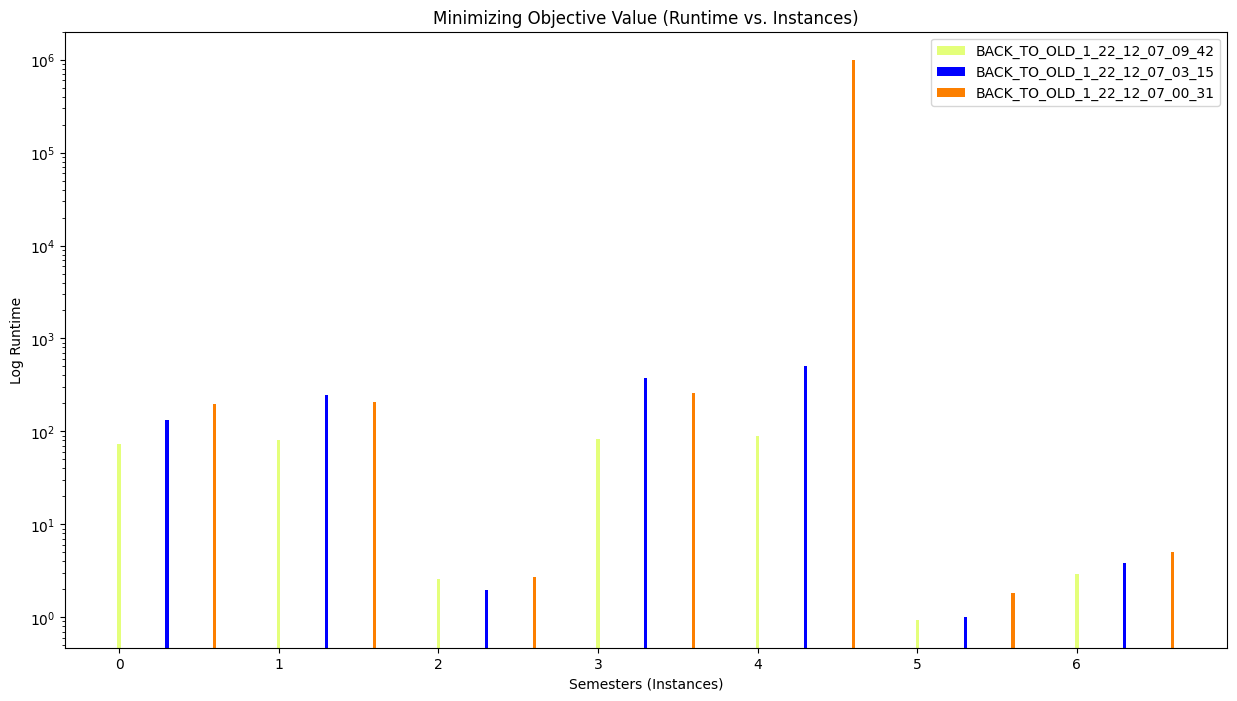

In [45]:
plt.figure(figsize=(15, 8))
X = np.arange(instance_num)
loc = 0
colors = plt.cm.Wistia(np.linspace(0, 256, len(runtime_list)))

for j, config_results in enumerate(runtime_list[:3]):
    if j == 1:
        plt.bar(X + loc, config_results, width=0.02, color="blue")
    else:
        plt.bar(X + loc, config_results, width=0.02, color=colors[j])
    loc += 0.3
# plt.bar(X + 0.1, runtime_list[1], width=0.1, color="palegoldenrod")
# plt.bar(X + 0.2, runtime_list[2], width = 0.1, color = "darkkhaki")
# plt.bar(X + 0.3, runtime_list[3], width=0.1, color="goldenrod")
#plt.bar(X + 0.4, runtime_list[4], width=0.1, color="darkgoldenrod")
plt.title(f'Minimizing Objective Value (Runtime vs. Instances)')
plt.ylabel("Log Runtime")
plt.xlabel("Semesters (Instances)")
plt.legend([dir_name_list[0], dir_name_list[1], dir_name_list[2], dir_name_list[3]])#, dir_name_list[4]])
plt.yscale('log')
#plt.ylim(0,10**2.7)

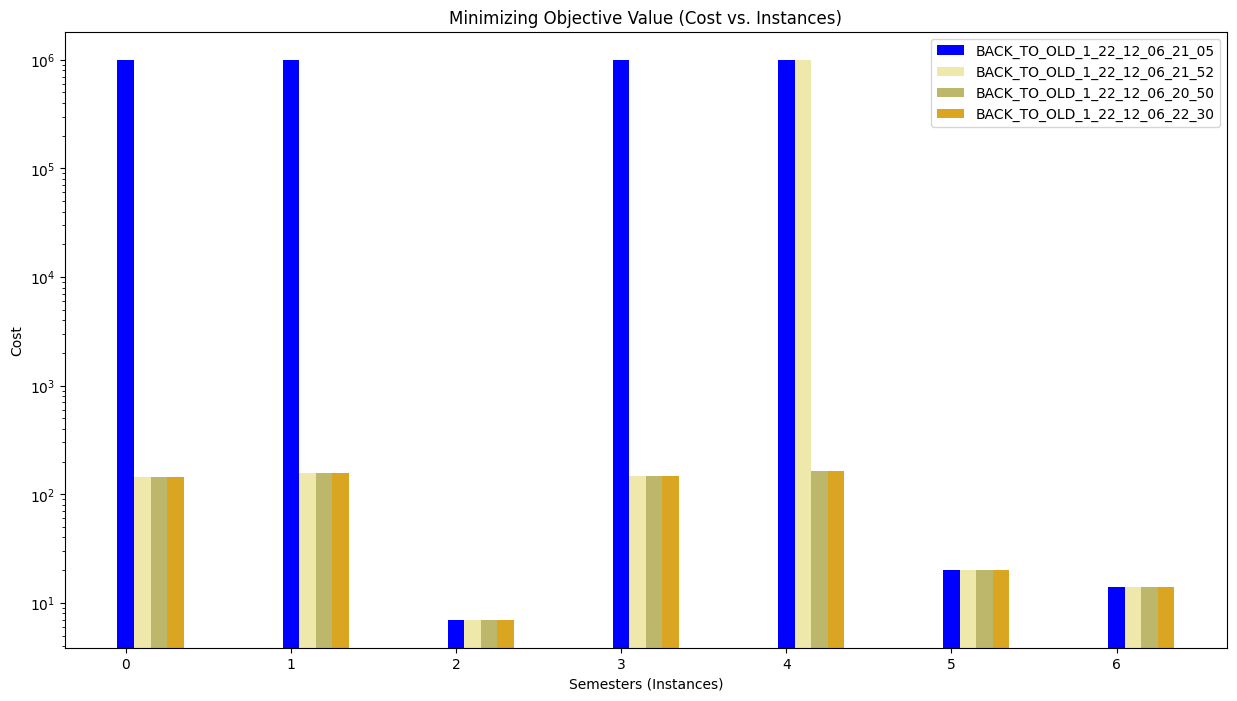

In [49]:
plt.figure(figsize=(15, 8))
X = np.arange(instance_num)
plt.bar(X, obj_list[0], label=i, width=0.1, color="blue")
plt.bar(X + 0.1, obj_list[1], width=0.1, color="palegoldenrod")
plt.bar(X + 0.2, obj_list[2], width=0.1, color="darkkhaki")
plt.bar(X + 0.3, obj_list[3], width=0.1, color="goldenrod")
# plt.bar(X + 0.4, obj_list[4], width=0.1, color="darkgoldenrod")
plt.title(f'Minimizing Objective Value (Cost vs. Instances)')
plt.ylabel("Cost")
plt.xlabel("Semesters (Instances)")
plt.legend([dir_name_list[0], dir_name_list[1],
           dir_name_list[2], dir_name_list[3]])#, dir_name_list[4]])
plt.yscale('log')
#plt.ylim(0,350)


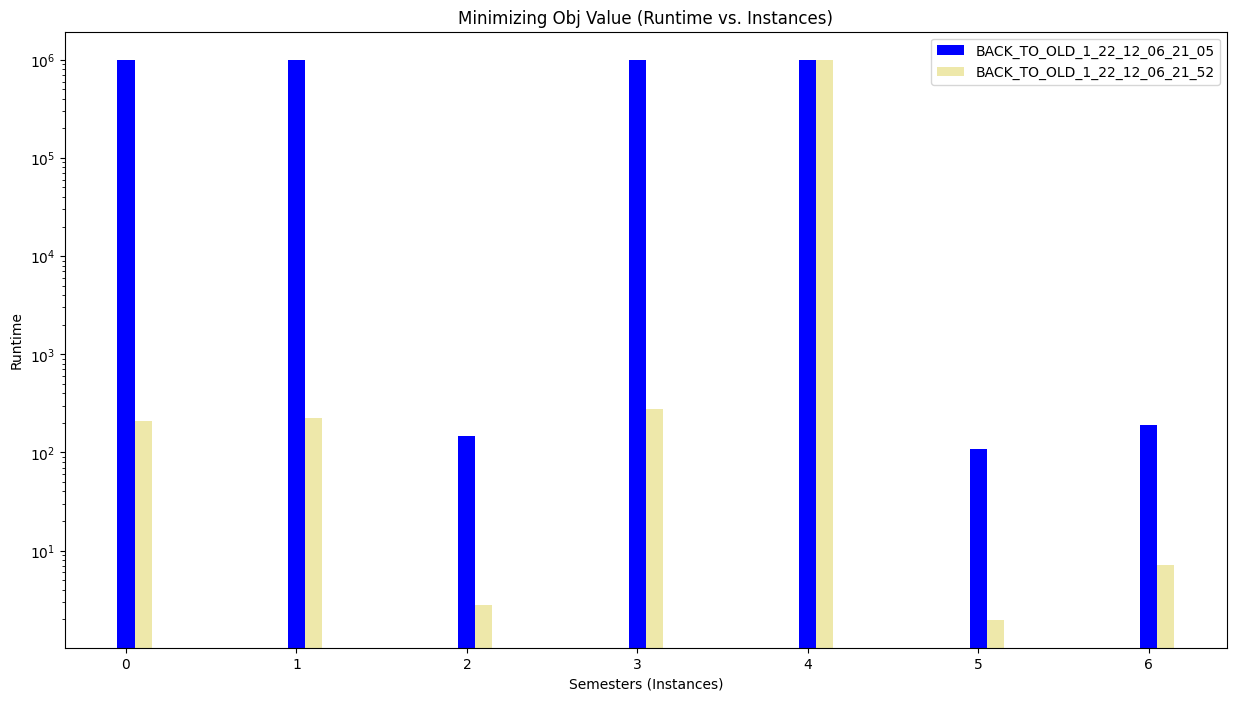

In [29]:
plt.figure(figsize=(15, 8))
X = np.arange(instance_num)
plt.bar(X, runtime_list[0], label=i, width=0.1, color="blue")
plt.bar(X + 0.1, runtime_list[1], width=0.1, color="palegoldenrod")
plt.title(f'Minimizing Obj Value (Runtime vs. Instances)')
plt.ylabel("Runtime")
plt.xlabel("Semesters (Instances)")
plt.legend([dir_name_list[0], dir_name_list[1]])
plt.yscale('log')
#plt.ylim(0,10**3)


In [ ]:
# plt.figure(figsize=(15, 8))
# X = np.arange(instance_num)
# plt.bar(X, obj_list[0], label=i, width = 0.1)
# plt.bar(X + 0.1, obj_list[1], width=0.1)
# plt.title(f'Minimizing Cost (Cost vs. Instances)')
# plt.ylabel("Cost")
# plt.xlabel("Instances")
# plt.legend([dir_name_list[0], dir_name_list[1]])
# #plt.yscale('log')
# #plt.ylim(0,10**3)


In [ ]:
avg_runtime


[350.970857142857, 288.2108571428572, 326.3082142857144, 397.9105714285719]

In [ ]:
runtime_list[4]

[690.8910000000033,
 560.75,
 837.2340000000113,
 235.89100000000326,
 2.2660000000032596,
 8.51600000000326,
 604.5940000000119,
 431.8119999999908,
 1000.875,
 565.8119999999908,
 6.062000000005355,
 2.3910000000032596,
 9.797000000005937,
 6.625]

In [ ]:
avg_runtime


[228.62942857142585,
 385.4453571428582,
 293.31257142856964,
 613.4987142857145,
 354.53685714285945]

([<matplotlib.axis.XTick at 0x7fdc72e46580>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

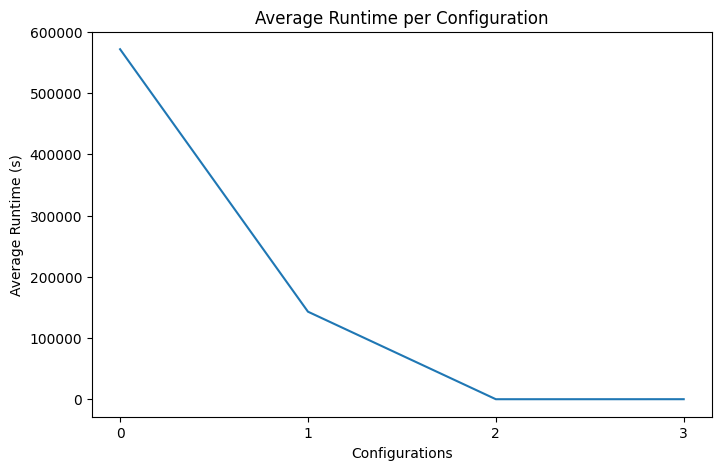

In [51]:
avg_runtime = []
for run in runtime_list:
    avg_runtime.append(np.mean(run))


plt.figure(figsize=(8,5))
plt.plot(avg_runtime)
plt.title("Average Runtime per Configuration")
plt.xlabel("Configurations")
plt.ylabel("Average Runtime (s)")
plt.xticks([0,1,2,3])
#plt.yscale('log')

# Schedule Display

In [ ]:
file = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\min_cost_T1\MC_14_Trial__aDEFAULT\DF_Schedual_6.csv"
df_schedule = pd.read_csv(file)
df_schedule = df_schedule.drop(["Unnamed: 0"],axis=1)
display(df_schedule)

,timeslot,EXAM,TIMESLOT,ROOM,Room Size,Class Size,Student ID
0,0,CME210H1F,2022-04-11 : 09:00:00,MS 3154,69,51,"['0x06353BFE817DA33720C3AF44C400F40A08AE71D8',..."
1,0,AER301H1F,2022-04-11 : 09:00:00,MS 2158,143,45,"['0x2B942AC9077FECB283B07CE345DB1737FBA3D626',..."
2,0,CIV519H1F,2022-04-11 : 09:00:00,EX 310,106,11,"['0x7CB16F7D26284F7E1E602B905C5048DD08F4E797',..."
3,0,ECE367H1F,2022-04-11 : 09:00:00,BN 3,231,32,"['0x1F948EBE68B4329EF4367E257E0C90EBDA28645D',..."
4,0,MSE332H1F,2022-04-11 : 09:00:00,WY 119,80,28,"['0x5E53B8D56EEFC6696D5C4BD14FC7B9B6D2162B5E',..."
...,...,...,...,...,...,...,...
158,63,APS325H1F,2022-04-30 : 14:00:00,EJ 209,50,13,"['0x8C76FF24380CB32425748BD81CE39074BC8C56E3',..."
159,63,MIE360H1F,2022-04-30 : 14:00:00,MS 2158,143,79,"['0x895F9BDE51AF7C3A1E982207FE043A2B04EBCBBB',..."
160,63,ECE324H1F,2022-04-30 : 14:00:00,ES 1050,109,20,"['0x1F948EBE68B4329EF4367E257E0C90EBDA28645D',..."
161,63,APS113Y1Y,2022-04-30 : 14:00:00,BN 2S,384,11,"['0x5A570FFFC8C2D4F6C7CDB0B189355A143135BCEC',..."


In [ ]:
# file = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\cplex_results\MC_14_Trial__22_12_03_15_44\DF_Schedual_0_timefail.csv"
# df_schedule = pd.read_csv(file)
# df_schedule = df_schedule.drop(["Unnamed: 0"],axis=1)
# display(df_schedule)

In [ ]:
len(runtime_list)

5

In [ ]:
# file = "Exam Sched Prog Datasets.xlsx"
# file = r"C:\Users\William Hazen\Documents\GitHub\exam-timetabling-smac\Exam Sched Prog Datasets.xlsx"

# rooms = pd.read_excel(file, sheet_name="datasets room caps ")
# # courses_20221 = pd.read_excel(file, sheet_name = "20221 course size")
# # enrolments_20221 = pd.read_excel(file, sheet_name = "20221 anonymized enrolments")
# # schedule_20221 = pd.read_excel(file, sheet_name="20221 Final Schedule_fromLSM")
# hist_anonymized_enrolments = pd.read_excel(file, sheet_name="hist anonymized enrolments")


In [ ]:
# rooms.drop("Note",axis=1)

In [ ]:
# hist_anonymized_enrolments.drop(["ADMINFACULTYCODE", "ADMINDEPT"],axis=1)


In [ ]:
# hist_anonymized_enrolments


# Results Data Frames

In [52]:
df_batch_1 = pd.DataFrame({
    "Status": status_list[0],
    "(1) Runtime": runtime_list[0],
    "Obj Value": obj_list[0]
})

df_batch_1

,Status,(1) Runtime,Obj Value
0,unknown,1000000.000000,1000000.00
1,unknown,1000000.000000,1000000.00
2,solution,148.232316,7.00
3,unknown,1000000.000000,1000000.00
4,unknown,1000000.000000,1000000.00
5,bound,108.751770,19.95
6,solution,189.569013,14.00


In [53]:
df_batch_2 = pd.DataFrame({
    "(2) Status": status_list[1],
    "Runtime": runtime_list[1],
    "Obj Value": obj_list[1]
})

df_batch_2

,(2) Status,Runtime,Obj Value
0,bound,208.054799,143.766667
1,bound,224.748339,157.016667
2,solution,2.810152,7.000000
3,bound,276.796958,148.583333
4,unknown,1000000.000000,1000000.000000
5,bound,1.976584,19.950000
6,solution,7.121993,14.000000


In [54]:
df_batch_3 = pd.DataFrame({
    "(3) Status": status_list[2],
    "Runtime": runtime_list[2],
    "Obj Value": obj_list[2]
})

df_batch_3

,(3) Status,Runtime,Obj Value
0,bound,20.426922,143.766667
1,bound,18.270295,157.016667
2,solution,1.015405,7.000000
3,bound,34.620785,148.583333
4,bound,184.136205,164.933333
5,bound,0.788297,19.950000
6,solution,1.714111,14.000000


In [ ]:
df_batch_4 = pd.DataFrame({
    "Status": status_list[3],
    "Runtime": runtime_list[3],
    "Obj Value": obj_list[3]
})

df_batch_4

,Status,Runtime,Obj Value
0,bound,224.610,143.766667
1,bound,336.796,290.700000
2,solution,246.718,158.000000
3,bound,1078.203,292.700000
4,solution,4.218,7.000000
5,solution,12.219,11.000000
6,bound,306.344,148.583333
7,bound,757.813,303.666667
8,bound,3558.093,164.933333
9,bound,2038.938,314.800000


In [ ]:
# df_batch_5 = pd.DataFrame({
#     "Status": status_list[4],
#     "Runtime": runtime_list[4],
#     "Obj Value": obj_list[4]
# })

# df_batch_5

In [55]:
totals = pd.concat([df_batch_1, df_batch_2, df_batch_3], axis=1)#.drop("Obj Value",axis=1)

In [56]:
totals

,Status,(1) Runtime,Obj Value,(2) Status,Runtime,Obj Value,(3) Status,Runtime,Obj Value
0,unknown,1000000.000000,1000000.00,bound,208.054799,143.766667,bound,20.426922,143.766667
1,unknown,1000000.000000,1000000.00,bound,224.748339,157.016667,bound,18.270295,157.016667
2,solution,148.232316,7.00,solution,2.810152,7.000000,solution,1.015405,7.000000
3,unknown,1000000.000000,1000000.00,bound,276.796958,148.583333,bound,34.620785,148.583333
4,unknown,1000000.000000,1000000.00,unknown,1000000.000000,1000000.000000,bound,184.136205,164.933333
5,bound,108.751770,19.95,bound,1.976584,19.950000,bound,0.788297,19.950000
6,solution,189.569013,14.00,solution,7.121993,14.000000,solution,1.714111,14.000000


In [57]:
totals["(1) Runtime"].sort_values()


5        108.751770
2        148.232316
6        189.569013
0    1000000.000000
1    1000000.000000
3    1000000.000000
4    1000000.000000
Name: (1) Runtime, dtype: float64

In [59]:
df_batch_runtime = pd.DataFrame({
    "Status": status_list[0],
    "Obj Value": obj_list[0],
    "(1) Runtime": runtime_list[0],
    "(2) Runtime": runtime_list[1],
    "(3) Runtime": runtime_list[2],
    #"(4) Runtime": runtime_list[3],
    #"(5) Runtime": runtime_list[4],
})

df_batch_runtime

,Status,Obj Value,(1) Runtime,(2) Runtime,(3) Runtime
0,unknown,1000000.00,1000000.000000,208.054799,20.426922
1,unknown,1000000.00,1000000.000000,224.748339,18.270295
2,solution,7.00,148.232316,2.810152,1.015405
3,unknown,1000000.00,1000000.000000,276.796958,34.620785
4,unknown,1000000.00,1000000.000000,1000000.000000,184.136205
5,bound,19.95,108.751770,1.976584,0.788297
6,solution,14.00,189.569013,7.121993,1.714111


In [60]:
df_batch_runtime.describe()

,Obj Value,(1) Runtime,(2) Runtime,(3) Runtime
count,7.000000,7.000000,7.000000,7.000000
mean,571434.421429,571492.364728,142960.215546,37.281717
std,534515.187606,534442.920110,377919.040685,65.993572
min,7.000000,108.751770,1.976584,0.788297
25%,16.975000,168.900664,4.966072,1.364758
50%,1000000.000000,1000000.000000,208.054799,18.270295
75%,1000000.000000,1000000.000000,250.772649,27.523854
max,1000000.000000,1000000.000000,1000000.000000,184.136205


In [61]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


In [63]:
y_true = df_batch_1.drop(["Status", "Obj Value"], axis=1)

y_predict_2 = df_batch_2.drop(["(2) Status", "Obj Value"], axis=1)
y_predict_3 = df_batch_3.drop(["(3) Status", "Obj Value"], axis=1)
#y_predict_4 = df_batch_4.drop(["Status", "Obj Value"], axis=1)
#y_predict_5 = df_batch_5.drop(["Status", "Obj Value"], axis=1)


In [65]:
err_2 = mean_absolute_error(y_true, y_predict_2)
err_3 = mean_absolute_error(y_true, y_predict_3)
#err_4 = mean_absolute_error(y_true, y_predict_4)
#err_5 = mean_absolute_error(y_true, y_predict_5)

print(err_2,err_3)#, err_4)#, err_5)

428532.14918197907 571455.0830112526


In [ ]:
p_err_2 = mean_absolute_percentage_error(y_true, y_predict_2)
p_err_3 = mean_absolute_percentage_error(y_true, y_predict_3)
p_err_4 = mean_absolute_percentage_error(y_true, y_predict_4)
#p_err_5 = mean_absolute_percentage_error(y_true, y_predict_5)
print(p_err_2,p_err_3, p_err_4), #p_err_5)

0.6504966999040506 1.6184928821140472 1.3466813342628978


(None,)

In [ ]:
p_err_2 = np.sqrt(mean_squared_error(y_true, y_predict_2))
p_err_3 = np.sqrt(mean_squared_error(y_true, y_predict_3))
p_err_4 = np.sqrt(mean_squared_error(y_true, y_predict_4))
#p_err_5 = np.sqrt(mean_squared_error(y_true, y_predict_5))
print(p_err_2,p_err_3, p_err_4)#, p_err_5)

414.2343723138065 455.4733891670184 818.4319911779045


In [ ]:
y_true = df_batch_1.drop("Status", axis=1)

y_predict_2 = df_batch_2.drop("(2) Status", axis=1)
y_predict_3 = df_batch_3.drop("(3) Status", axis=1)
y_predict_4 = df_batch_4.drop("Status", axis=1)
#y_predict_5 = df_batch_5.drop(["Status"], axis=1)


In [ ]:
err_2 = mean_absolute_error(y_true, y_predict_2)
err_3 = mean_absolute_error(y_true, y_predict_3)
err_4 = mean_absolute_error(y_true, y_predict_4)
#err_5 = mean_absolute_error(y_true, y_predict_5)
print(err_2,err_3, err_4)#, err_5)

83.05974999999982 86.33478571428714 201.7113571428594


In [ ]:
p_err_2 = mean_absolute_percentage_error(y_true, y_predict_2)
p_err_3 = mean_absolute_percentage_error(y_true, y_predict_3)
p_err_4 = mean_absolute_percentage_error(y_true, y_predict_4)
#p_err_5 = mean_absolute_percentage_error(y_true, y_predict_5)

print(p_err_2,p_err_3, p_err_4)#, p_err_5)

0.3252483499520253 0.8092464410570236 0.6733406671314489


In [ ]:
p_err_2 = np.sqrt(mean_squared_error(y_true, y_predict_2))
p_err_3 = np.sqrt(mean_squared_error(y_true, y_predict_3))
p_err_4 = np.sqrt(mean_squared_error(y_true, y_predict_4))
#p_err_5 = np.sqrt(mean_squared_error(y_true, y_predict_5))
print(p_err_2,p_err_3, p_err_4)#, p_err_5)

292.9079336636456 322.0683221300181 578.7188109019049
